In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [2]:
df = pd.read_csv('ANSUR II FEMALE Public.csv', encoding = 'ISO-8859-1')

In [3]:
df = df[["cervicaleheight", "chestbreadth", "chestcircumference", "chestdepth", "chestheight", "elbowrestheight",
         "forearmcenterofgriplength", "forearmcircumferenceflexed", "forearmforearmbreadth", "forearmhandlength",
         "abdominalextensiondepthsitting", "acromionradialelength", "biacromialbreadth", "bicepscircumferenceflexed", 
         "bicristalbreadth", "bideltoidbreadth", "waistbreadth", "waistcircumference", "waistdepth", "waistfrontlengthsitting",
         "wristcircumference", "wristheight", "Heightin", "neckcircumferencebase", "shoulderlength", "waistbacklength", 
         "hipbreadth", "hipbreadthsitting", "interscyei", "interscyeii"]]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 30 columns):
cervicaleheight                   1986 non-null int64
chestbreadth                      1986 non-null int64
chestcircumference                1986 non-null int64
chestdepth                        1986 non-null int64
chestheight                       1986 non-null int64
elbowrestheight                   1986 non-null int64
forearmcenterofgriplength         1986 non-null int64
forearmcircumferenceflexed        1986 non-null int64
forearmforearmbreadth             1986 non-null int64
forearmhandlength                 1986 non-null int64
abdominalextensiondepthsitting    1986 non-null int64
acromionradialelength             1986 non-null int64
biacromialbreadth                 1986 non-null int64
bicepscircumferenceflexed         1986 non-null int64
bicristalbreadth                  1986 non-null int64
bideltoidbreadth                  1986 non-null int64
waistbreadth                 

In [5]:
df.isnull().sum()

cervicaleheight                   0
chestbreadth                      0
chestcircumference                0
chestdepth                        0
chestheight                       0
elbowrestheight                   0
forearmcenterofgriplength         0
forearmcircumferenceflexed        0
forearmforearmbreadth             0
forearmhandlength                 0
abdominalextensiondepthsitting    0
acromionradialelength             0
biacromialbreadth                 0
bicepscircumferenceflexed         0
bicristalbreadth                  0
bideltoidbreadth                  0
waistbreadth                      0
waistcircumference                0
waistdepth                        0
waistfrontlengthsitting           0
wristcircumference                0
wristheight                       0
Heightin                          0
neckcircumferencebase             0
shoulderlength                    0
waistbacklength                   0
hipbreadth                        0
hipbreadthsitting           

In [6]:
df['Heightin'] = df['Heightin'] * 25.4

In [7]:
df.head()

,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,elbowrestheight,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,abdominalextensiondepthsitting,acromionradialelength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,wristcircumference,wristheight,Heightin,neckcircumferencebase,shoulderlength,waistbacklength,hipbreadth,hipbreadthsitting,interscyei,interscyeii
0,1336,274,922,245,1095,220,316,265,517,432,231,301,373,315,263,466,295,850,217,345,152,756,1549.4,368,148,406,345,388,363,399
1,1440,261,839,206,1234,208,341,247,468,463,194,320,372,272,250,430,254,708,168,329,155,815,1625.6,345,142,422,315,335,340,375
2,1451,287,874,223,1226,204,343,262,488,469,183,329,397,300,276,450,269,727,159,367,162,799,1727.2,369,164,419,356,399,345,399
3,1430,269,1008,285,1170,244,331,309,529,455,261,306,384,364,276,484,302,923,235,371,173,818,1676.4,386,157,451,337,402,392,435
4,1362,305,1089,290,1112,233,339,260,596,447,309,308,378,320,336,525,405,1163,300,380,152,762,1600.2,358,156,452,448,499,428,435


In [8]:
df.describe()

,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,elbowrestheight,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,abdominalextensiondepthsitting,acromionradialelength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,wristcircumference,wristheight,Heightin,neckcircumferencebase,shoulderlength,waistbacklength,hipbreadth,hipbreadthsitting,interscyei,interscyeii
count,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.00000,1986.000000,1986.000000,1986.000000,1986.000000
mean,1395.667170,269.329809,946.858006,247.40433,1171.636455,232.421954,317.711984,264.081571,494.828298,439.862034,229.651057,311.198389,365.348943,305.578550,273.299597,450.324270,299.894260,860.905337,213.030715,355.136455,154.792548,794.190332,1640.883484,371.162135,135.405337,425.40282,353.836858,398.961732,373.364048,395.708963
std,59.523731,18.582988,82.699115,27.33815,55.499833,26.250090,18.024909,18.517835,41.012626,23.375763,31.464691,17.164691,18.298851,30.757033,22.260454,28.687416,32.959114,99.931771,31.373874,23.945046,7.827695,38.194755,71.169234,19.658441,10.274340,26.38895,26.669685,32.749112,29.834099,25.707126
min,1184.000000,213.000000,695.000000,170.00000,984.000000,145.000000,258.000000,200.000000,376.000000,342.000000,155.000000,249.000000,283.000000,216.000000,197.000000,357.000000,211.000000,611.000000,138.000000,289.000000,124.000000,672.000000,1422.400000,302.000000,107.000000,345.00000,276.000000,307.000000,270.000000,306.000000
25%,1355.000000,257.000000,889.000000,228.00000,1134.000000,215.000000,306.000000,251.000000,466.000000,424.000000,207.000000,300.000000,353.000000,285.000000,258.000000,430.000000,276.000000,790.000000,190.000000,338.000000,150.000000,769.000000,1600.200000,358.000000,128.000000,407.00000,336.000000,377.000000,352.000000,379.000000
50%,1393.000000,268.000000,940.000000,245.00000,1169.000000,233.000000,316.000000,263.000000,492.000000,438.000000,227.000000,311.000000,365.000000,304.000000,273.000000,450.000000,298.000000,852.000000,209.000000,355.000000,154.000000,794.000000,1625.600000,370.000000,135.000000,424.50000,353.000000,397.000000,373.000000,396.000000
75%,1434.000000,281.000000,999.000000,266.00000,1209.000000,251.000000,329.000000,276.000000,520.000000,454.000000,249.000000,323.000000,378.000000,324.000000,287.000000,469.000000,321.000000,925.000000,232.000000,370.000000,160.000000,819.000000,1676.400000,383.000000,142.000000,442.00000,370.000000,419.000000,392.750000,412.000000
max,1587.000000,348.000000,1266.000000,353.00000,1355.000000,310.000000,392.000000,342.000000,667.000000,527.000000,358.000000,371.000000,422.000000,435.000000,362.000000,558.000000,461.000000,1334.000000,367.000000,432.000000,183.000000,941.000000,2032.000000,457.000000,175.000000,532.00000,473.000000,541.000000,481.000000,493.000000


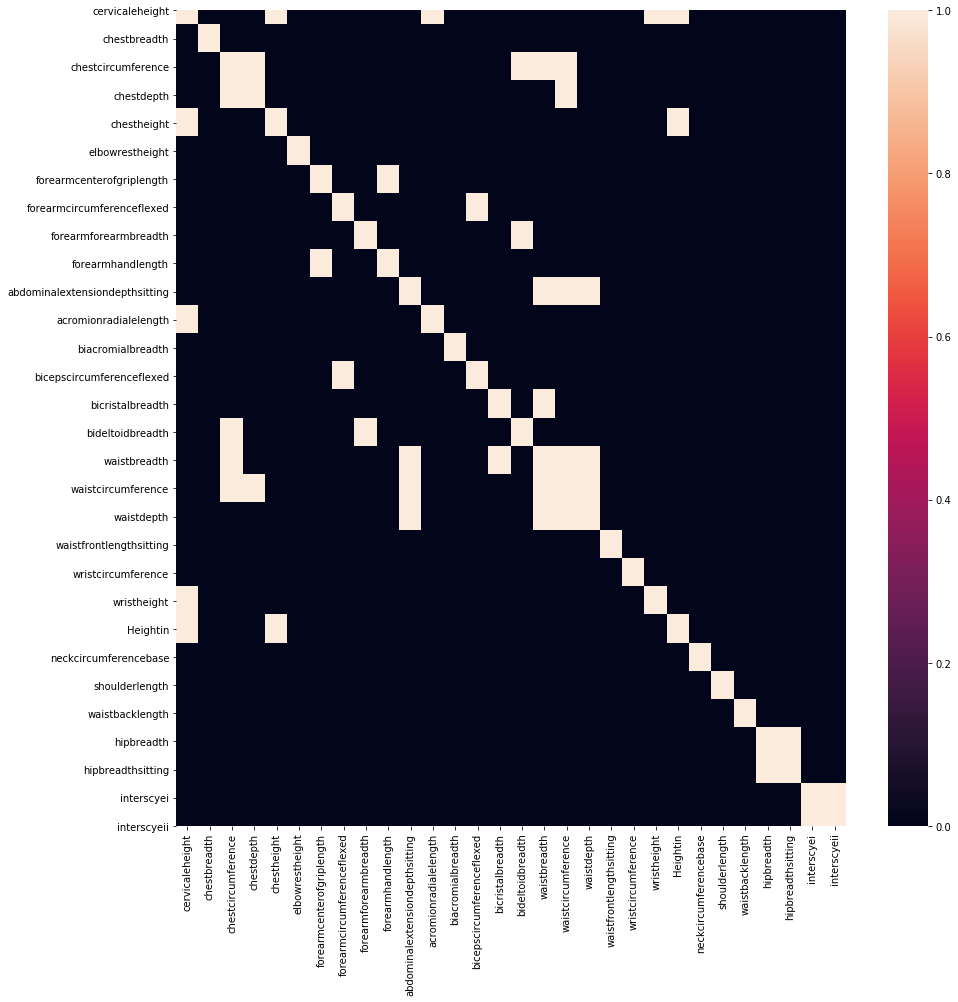

In [9]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr() > 0.8)

In [10]:
df_new = df[["Heightin", "neckcircumferencebase", "shoulderlength", "biacromialbreadth",
             "interscyei", "acromionradialelength", "forearmhandlength", "chestbreadth",
             "chestcircumference", "bicepscircumferenceflexed", "bicristalbreadth",
             "waistfrontlengthsitting", "wristcircumference"]]#, "waistcircumference"]]

In [11]:
kmeans = KMeans(n_clusters=6)

In [12]:
kmeans.fit(df_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [13]:
labels = kmeans.predict(df_new)

In [14]:
centroids = kmeans.cluster_centers_

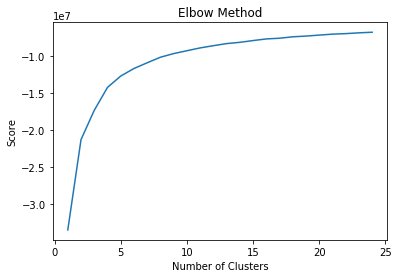

In [15]:
number_clusters = range(1, 25)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(df_new).score(df_new) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [16]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_new)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1986 samples in 0.015s...
[t-SNE] Computed neighbors for 1986 samples in 0.228s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1986
[t-SNE] Computed conditional probabilities for sample 1986 / 1986
[t-SNE] Mean sigma: 20.955461
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.791496
[t-SNE] KL divergence after 300 iterations: 1.406844


In [18]:
df_new['tsne-2d-one'] = tsne_results[:,0]
df_new['tsne-2d-two'] = tsne_results[:,1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
df_new.head()

,Heightin,neckcircumferencebase,shoulderlength,biacromialbreadth,interscyei,acromionradialelength,forearmhandlength,chestbreadth,chestcircumference,bicepscircumferenceflexed,bicristalbreadth,waistfrontlengthsitting,wristcircumference,tsne-2d-one,tsne-2d-two
0,1549.4,368,148,373,363,301,432,274,922,315,263,345,152,-6.995926,-8.912654
1,1625.6,345,142,372,340,320,463,261,839,272,250,329,155,-13.054068,4.694104
2,1727.2,369,164,397,345,329,469,287,874,300,276,367,162,-2.921625,13.196550
3,1676.4,386,157,384,392,306,455,269,1008,364,276,371,173,8.340731,0.083842
4,1600.2,358,156,378,428,308,447,305,1089,320,336,380,152,13.054868,-6.186538


In [21]:
df_new['labels'] = labels

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


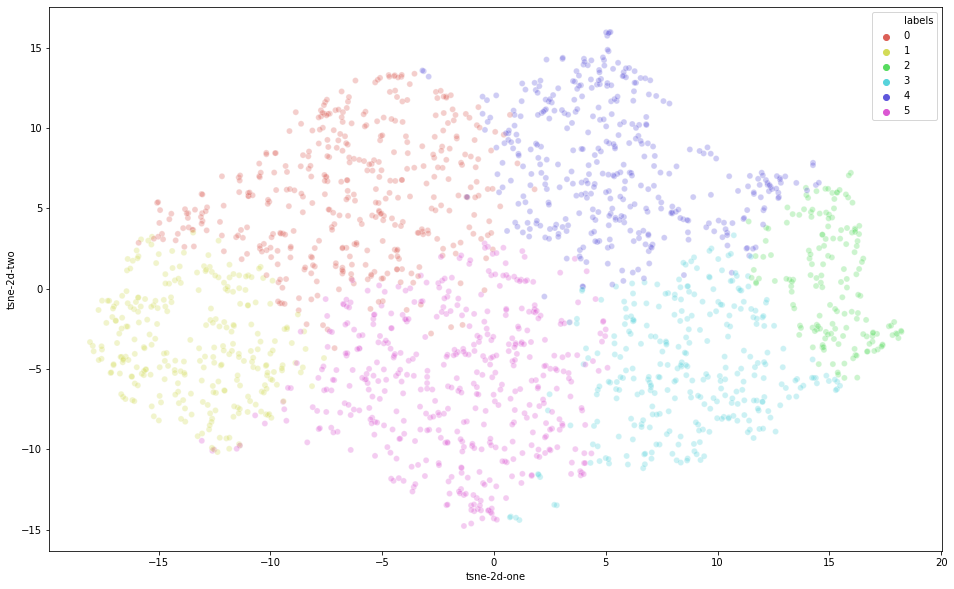

In [22]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="labels",
    palette=sns.color_palette("hls", 6),
    data=df_new,
    legend="full",
    alpha=0.3
)

In [29]:
df_0 = df_new.loc[df_new['labels'] == 0]
df_0 = df_0[['chestcircumference', 'biacromialbreadth', 'forearmhandlength']]
df_0.describe([0.9])

,chestcircumference,biacromialbreadth,forearmhandlength
count,403.000000,403.000000,403.000000
mean,872.990074,364.588089,443.111663
std,33.274374,14.481557,17.541562
min,766.000000,316.000000,396.000000
50%,877.000000,365.000000,440.000000
90%,912.800000,382.000000,467.000000
max,943.000000,405.000000,501.000000


In [30]:
df_1 = df_new.loc[df_new['labels'] == 1]
df_1= df_1[['chestcircumference', 'biacromialbreadth', 'forearmhandlength']]
df_1.describe([.9])

,chestcircumference,biacromialbreadth,forearmhandlength
count,280.000000,280.000000,280.000000
mean,851.882143,348.092857,418.171429
std,40.616711,14.419420,17.705453
min,695.000000,283.000000,342.000000
50%,854.500000,349.000000,418.000000
90%,900.000000,366.000000,440.000000
max,941.000000,384.000000,470.000000


In [31]:
df_2 = df_new.loc[df_new['labels'] == 2]
df_2= df_2[['chestcircumference', 'biacromialbreadth', 'forearmhandlength']]
df_2.describe([0.9])

,chestcircumference,biacromialbreadth,forearmhandlength
count,163.000000,163.000000,163.000000
mean,1094.644172,381.294479,464.030675
std,52.086903,17.053269,20.440043
min,1013.000000,330.000000,418.000000
50%,1093.000000,380.000000,463.000000
90%,1160.800000,404.000000,492.800000
max,1266.000000,419.000000,520.000000


In [33]:
df_3 = df_new.loc[df_new['labels'] == 3]
df_3= df_3[['chestcircumference', 'biacromialbreadth', 'forearmhandlength']]
df_3.describe([0.9])

,chestcircumference,biacromialbreadth,forearmhandlength
count,301.000000,301.000000,301.000000
mean,1038.953488,367.073090,435.275748
std,38.333856,15.389649,18.536101
min,972.000000,323.000000,375.000000
50%,1032.000000,367.000000,434.000000
90%,1089.000000,387.000000,458.000000
max,1196.000000,421.000000,510.000000


In [32]:
df_4 = df_new.loc[df_new['labels'] == 4]
df_4= df_4[['chestcircumference', 'biacromialbreadth', 'forearmhandlength']]
df_4.describe([0.9])

,chestcircumference,biacromialbreadth,forearmhandlength
count,378.000000,378.000000,378.000000
mean,955.306878,376.727513,459.981481
std,36.389377,16.058161,18.307923
min,792.000000,323.000000,414.000000
50%,955.000000,377.000000,458.000000
90%,1004.000000,397.300000,485.000000
max,1034.000000,422.000000,527.000000


In [34]:
df_5 = df_new.loc[df_new['labels'] == 5]
df_5= df_5[['chestcircumference', 'biacromialbreadth', 'forearmhandlength']]
df_5.describe([0.9])

,chestcircumference,biacromialbreadth,forearmhandlength
count,461.000000,461.000000,461.000000
mean,949.804772,360.401302,428.147505
std,30.292287,16.205525,16.323228
min,882.000000,311.000000,369.000000
50%,948.000000,361.000000,428.000000
90%,992.000000,381.000000,451.000000
max,1037.000000,407.000000,489.000000
